Code for Data analysis of satellite datasets.

In [101]:
import xarray
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import cartopy.feature as cf
from scipy import integrate as integrate
import math

In [8]:
olr_data = xarray.open_dataset('CERES_TOA_OutgoingLW.nc').toa_lw_all_mon
out_sw_data = xarray.open_dataset('CERES_TOA_OutgoingSW.nc').toa_sw_all_mon
in_sw_data = xarray.open_dataset('CERES_TOA_IncomingSW.nc').solar_mon
in_land_lwdata = xarray.open_dataset('CERES_SFC_DownLW.nc').sfc_lw_down_all_mon
in_land_swdata = xarray.open_dataset('CERES_SFC_DownSW.nc').sfc_sw_down_all_mon
outof_land_lwdata = xarray.open_dataset('CERES_SFC_UpLW.nc').sfc_lw_up_all_mon
outof_land_swdata = xarray.open_dataset('CERES_SFC_UpSW.nc').sfc_sw_up_all_mon
cloud_cover_areapercent = xarray.open_dataset('CERES_CLD_AreaPercent.nc').cldarea_total_daynight_mon
cloud_heighttemp = xarray.open_dataset('CERES_CLD_EffectiveTemperature.nc').cldtemp_total_daynight_mon

In [9]:
#Taking weak or more el nino
net_radiation=in_sw_data-(out_sw_data+olr_data)
only_december =olr_data['time.month']==12 
only_elnino_yr1418=(np.logical_or(olr_data['time.year']==2015 ,olr_data['time.year']==2018 ))#get data of 2014 and 2018
only_elnino_yr151819=np.logical_or(only_elnino_yr1418,olr_data['time.year']==2019)#get data of 2014,2015 and 2018
only_elnino_december=np.logical_and(only_december,only_elnino_yr151819)#get data of december of 2014,2015,2018

In [10]:
#Taking moderate or stronger la nina
only_lanina_yr1418=(np.logical_or(olr_data['time.year']==2011 ,olr_data['time.year']==2010 ))#get data of 2010 and 2011
only_lanina_yr141815=np.logical_or(only_lanina_yr1418,olr_data['time.year']==2020)
only_lanina_yr11121820=np.logical_or(only_lanina_yr141815,olr_data['time.year']==2017)#get data of 2014,2015 and 2018
only_lanina_december=np.logical_and(only_december,only_lanina_yr141815)#get data of december of 2014,2015,2018

In [11]:
#Taking data of December 2015(strongest el nino)

elnino15=np.logical_and(only_december,olr_data['time.year']==2015)

#Taking data from December 2010(strongest la nina in recent times)
lanina10=np.logical_and(only_december,olr_data['time.year']==2010)

<IPython.core.display.Javascript object>


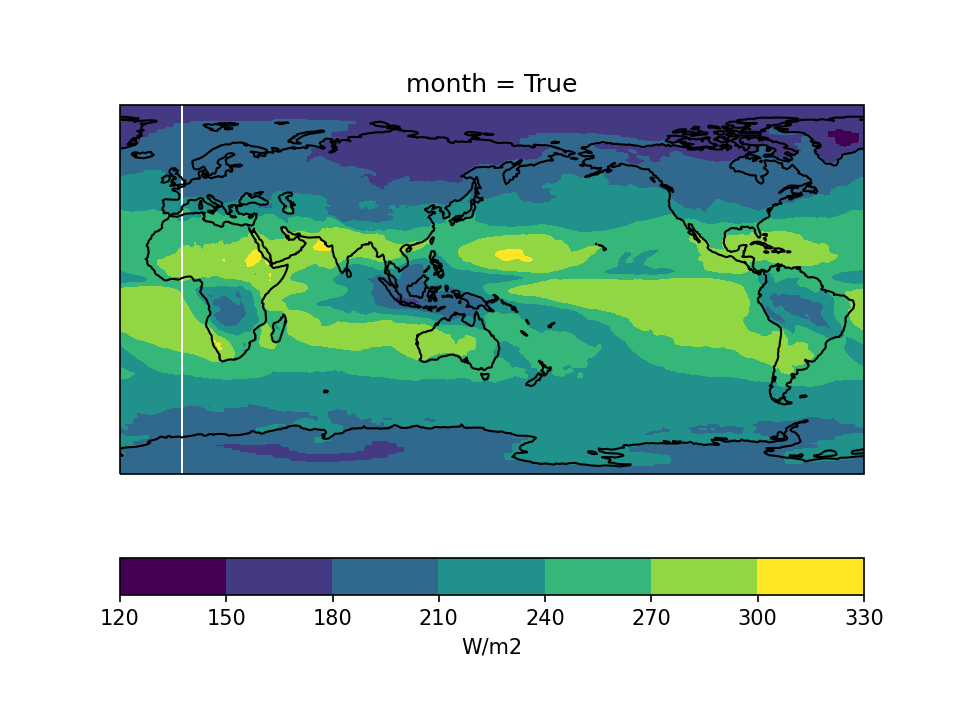

In [12]:
%matplotlib notebook
#Plotting la nina decembers of 2010,2011,2020,2017
ax = plt.subplot(projection=ccrs.PlateCarree(central_longitude=150))
olr_data.groupby(only_lanina_december==True).mean(dim='time')[1].plot.contourf(cbar_kwargs=dict(orientation='horizontal', label='W/m2'),transform=ccrs.PlateCarree())
ax.coastlines()

<IPython.core.display.Javascript object>


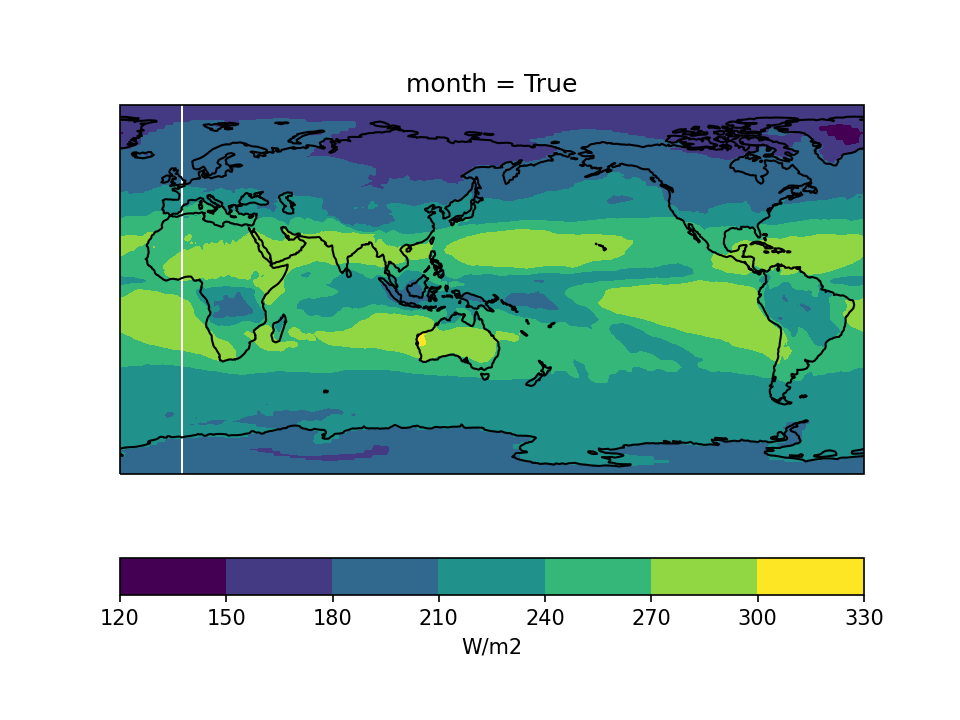

In [13]:
%matplotlib notebook
#Plotting el nino decembers of 2015,2018,2019
ax = plt.subplot(projection=ccrs.PlateCarree(central_longitude=150))
olr_data.groupby(only_elnino_december==True).mean(dim='time')[1].plot.contourf(cbar_kwargs=dict(orientation='horizontal', label='W/m2'),transform=ccrs.PlateCarree())
ax.coastlines()



<IPython.core.display.Javascript object>


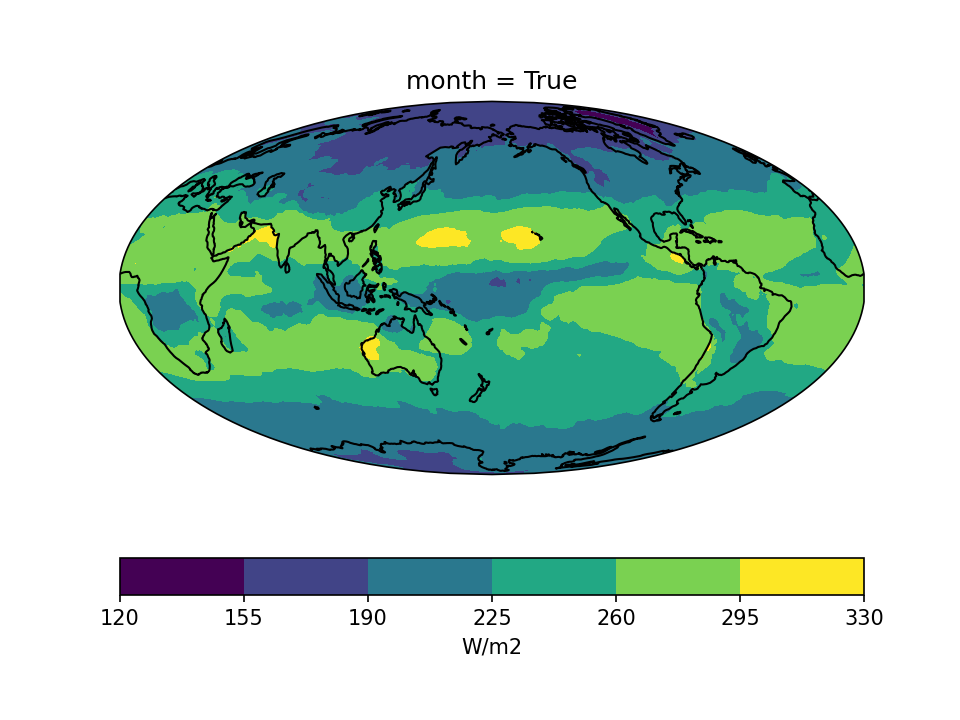

In [14]:
%matplotlib notebook
#Plotting el nino december of 2015
ax = plt.subplot(projection=ccrs.Mollweide(central_longitude=180))
olr_data.groupby(elnino15==True).mean(dim='time')[1].plot.contourf(cbar_kwargs=dict(orientation='horizontal', label='W/m2'),vmin=120,vmax=330,transform=ccrs.PlateCarree())
ax.coastlines()

<IPython.core.display.Javascript object>


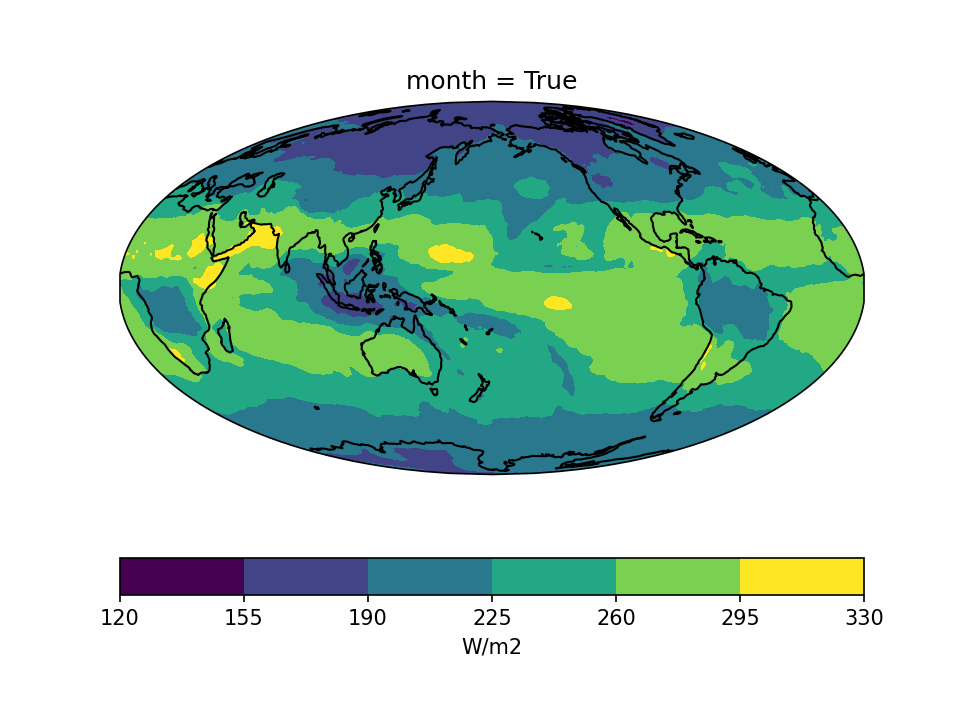

In [15]:
%matplotlib notebook
#Plotting la nina december of 2010
ax = plt.subplot(projection=ccrs.Mollweide(central_longitude=180))
olr_data.groupby(lanina10==True).mean(dim='time')[1].plot.contourf(cbar_kwargs=dict(orientation='horizontal', label='W/m2'),vmin=120,vmax=330,transform=ccrs.PlateCarree())
ax.coastlines()

<IPython.core.display.Javascript object>


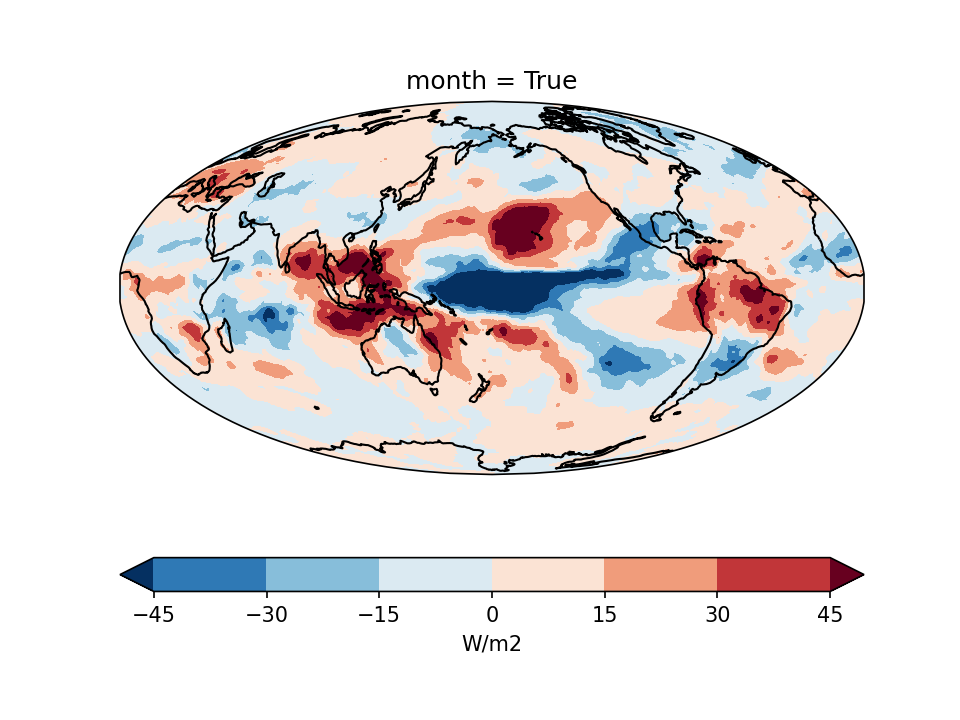

In [16]:

olr10=olr_data.groupby(lanina10==True).mean(dim='time')[1]
olr15=olr_data.groupby(elnino15==True).mean(dim='time')[1]


outlandlw10=outof_land_lwdata.groupby(lanina10==True).mean(dim='time')[1]
outlandlw15=outof_land_lwdata.groupby(elnino15==True).mean(dim='time')[1]

cloudcover10=cloud_cover_areapercent.groupby(lanina10==True).mean(dim='time')[1]
cloudcover15=cloud_cover_areapercent.groupby(elnino15==True).mean(dim='time')[1]

olrdiff=olr15-olr10 #Subtracting top of atmosphere olr of elnino15 from lanina10
outlandlwdiff=outlandlw15-outlandlw10#Subtracting surface outgoing lw radiation of elnino15 from la nina 10
cloudcoverdiff=cloudcover15-cloudcover10

%matplotlib notebook
ax = plt.subplot(projection=ccrs.Mollweide(central_longitude=180))
olrdiff.plot.contourf(cbar_kwargs=dict(orientation='horizontal', label='W/m2'),robust='True',transform=ccrs.PlateCarree())
ax.coastlines()

<IPython.core.display.Javascript object>


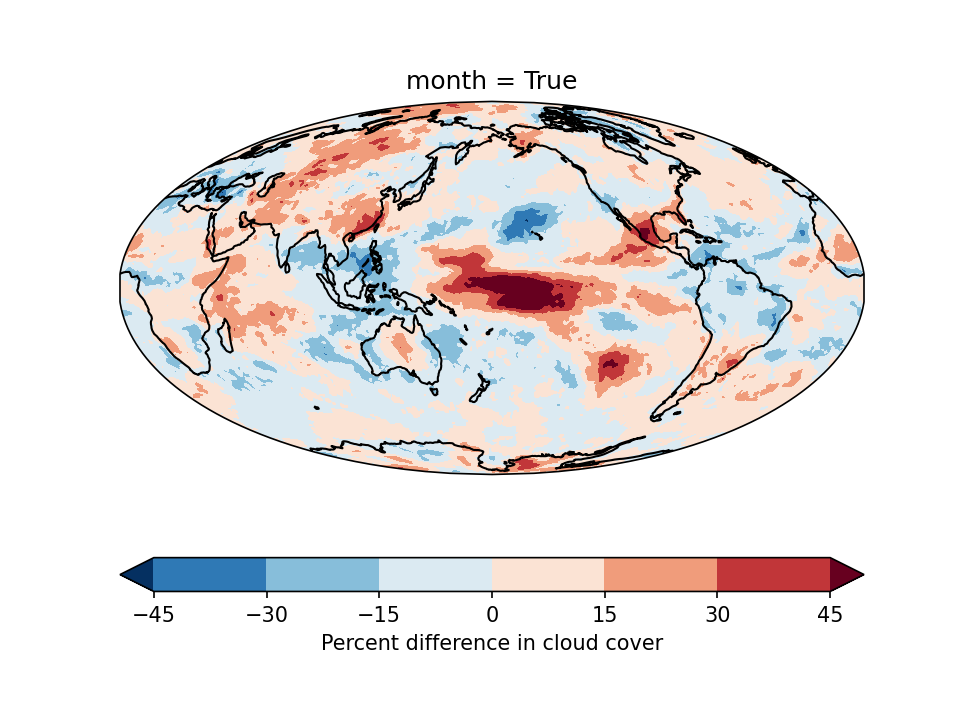

In [17]:
%matplotlib notebook
ax = plt.subplot(projection=ccrs.Mollweide(central_longitude=180))
cloudcoverdiff.plot.contourf(cbar_kwargs=dict(orientation='horizontal', label='Percent difference in cloud cover'),robust='True',transform=ccrs.PlateCarree())
ax.coastlines()

<IPython.core.display.Javascript object>


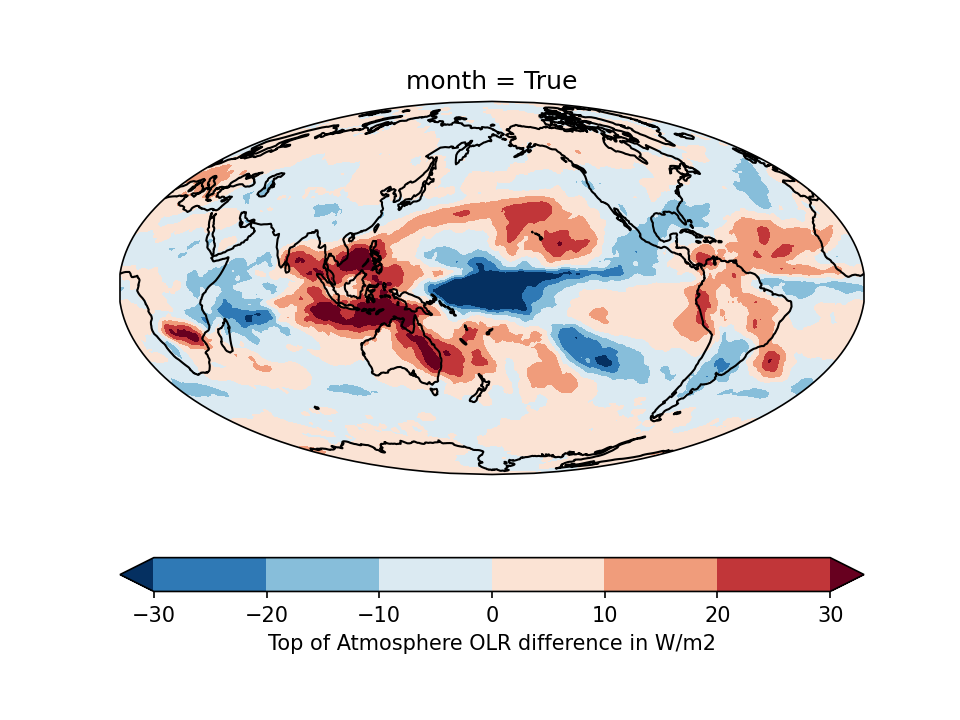

In [81]:
elninoavgolr=olr_data.groupby(only_elnino_december==True).mean(dim='time')[1]
laninaavgolr=olr_data.groupby(only_lanina_december==True).mean(dim='time')[1]

elninoavgoutlandlw=outof_land_lwdata.groupby(only_elnino_december==True).mean(dim='time')[1]
laninaavgoutlandlw=outof_land_lwdata.groupby(only_lanina_december==True).mean(dim='time')[1]

elninoavgcloud=cloud_cover_areapercent.groupby(only_elnino_december==True).mean(dim='time')[1]
laninaavgcloud=cloud_cover_areapercent.groupby(only_lanina_december==True).mean(dim='time')[1]

olravgdiff=elninoavgolr-laninaavgolr
cloudcoveravgdiff=elninoavgcloud-laninaavgcloud
outlandlwavgdiff =elninoavgoutlandlw-laninaavgoutlandlw

%matplotlib notebook
ax = plt.subplot(projection=ccrs.Mollweide(central_longitude=180))
olravgdiff.plot.contourf(cbar_kwargs=dict(orientation='horizontal', label='Top of Atmosphere OLR difference in W/m2'),robust='True',transform=ccrs.PlateCarree())
ax.coastlines()



<IPython.core.display.Javascript object>


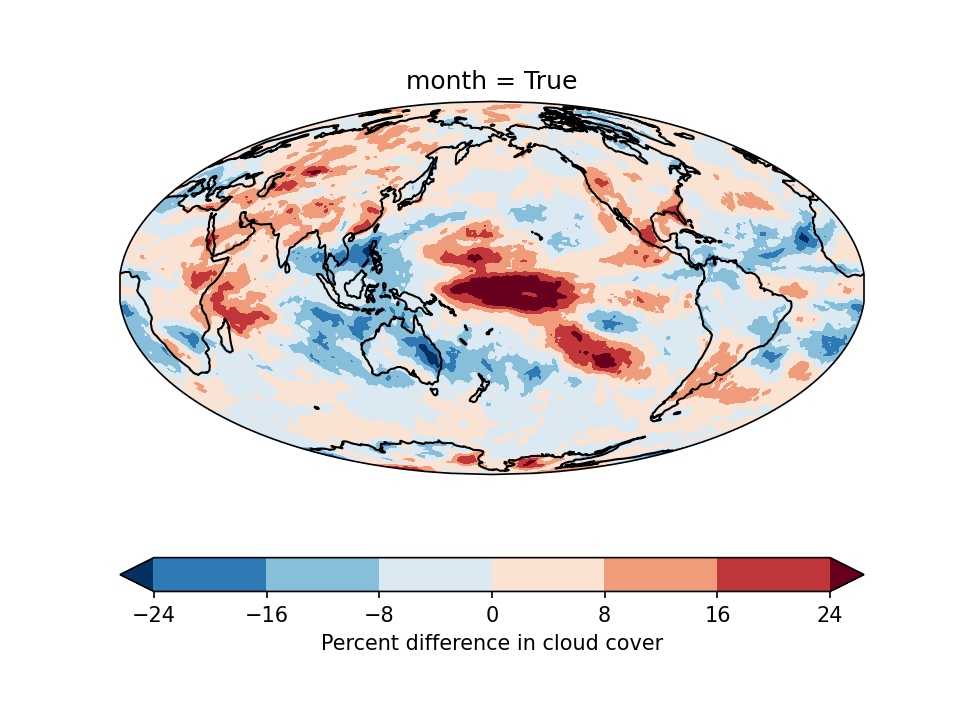

In [19]:
%matplotlib notebook
ax = plt.subplot(projection=ccrs.Mollweide(central_longitude=180))
cloudcoveravgdiff.plot.contourf(cbar_kwargs=dict(orientation='horizontal', label='Percent difference in cloud cover'),robust='True',transform=ccrs.PlateCarree())
ax.coastlines()

<IPython.core.display.Javascript object>


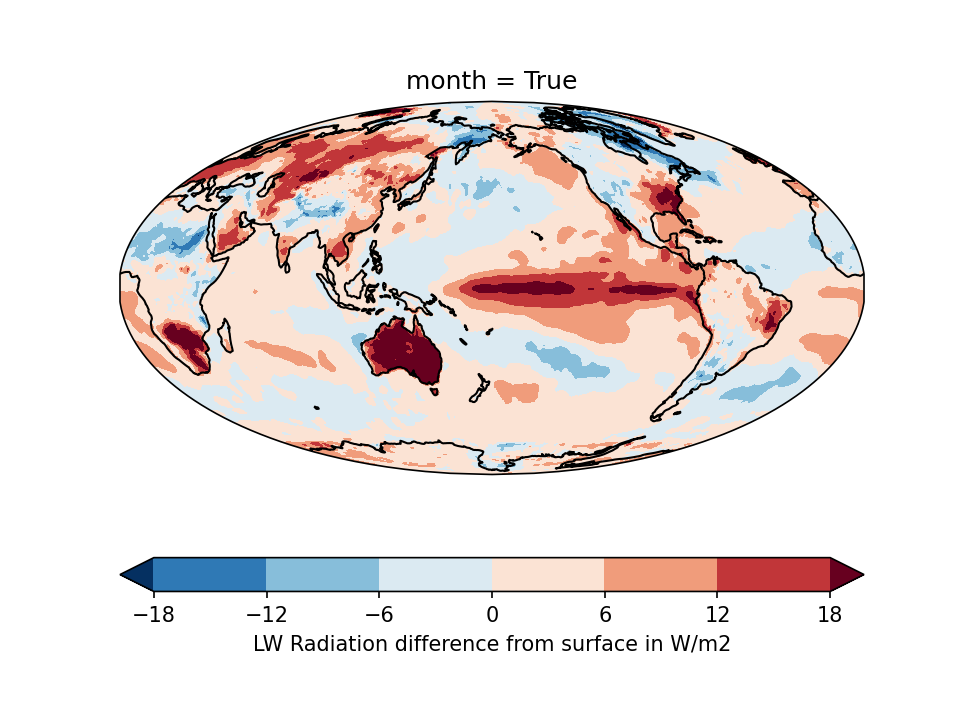

In [20]:

%matplotlib notebook
ax = plt.subplot(projection=ccrs.Mollweide(central_longitude=180))
outlandlwavgdiff.plot.contourf(cbar_kwargs=dict(orientation='horizontal', label='LW Radiation difference from surface in W/m2'),robust='True',transform=ccrs.PlateCarree())
ax.coastlines()

**Compute net radiation and its mean over the entire duration of the dataset** (Use TOA dataset)


In [21]:
netincoming_rad=in_sw_data-(out_sw_data+olr_data)

<IPython.core.display.Javascript object>


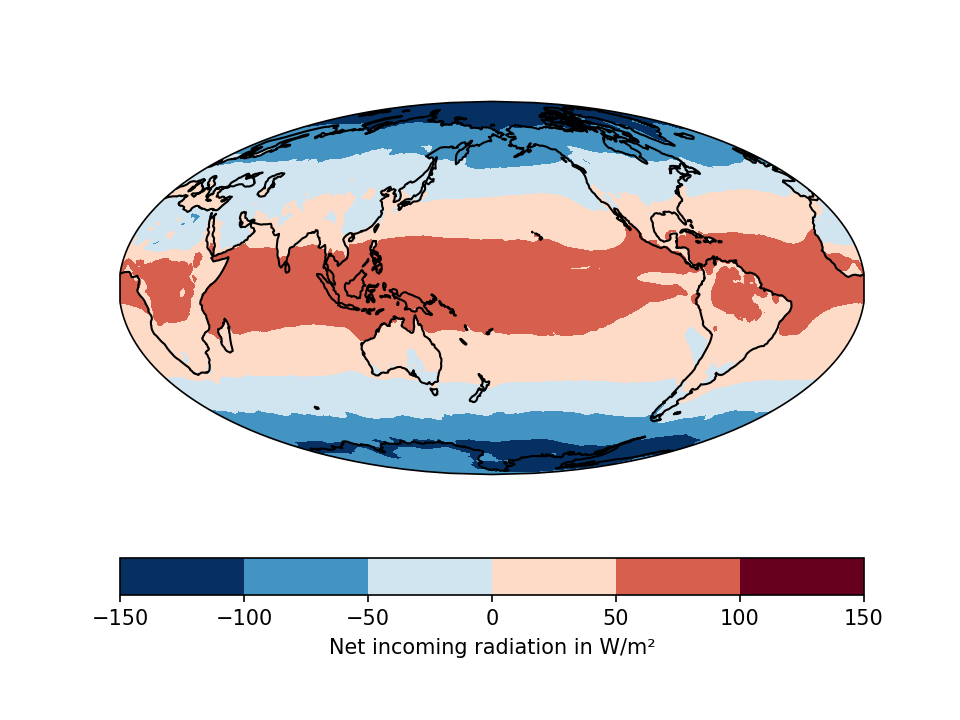

In [22]:
#Net radiation(incoming) mean over time
%matplotlib notebook
ax = plt.subplot(projection=ccrs.Mollweide(central_longitude=180))
mean_incoming_rad_time=netincoming_rad.mean(dim='time')
mean_incoming_rad_time.plot.contourf(cbar_kwargs=dict(orientation='horizontal', label='Net incoming radiation in W/m²'),transform=ccrs.PlateCarree())
ax.coastlines()

**Compute its zonal mean (i.e, mean along longitudes)** (TOA data)

<IPython.core.display.Javascript object>


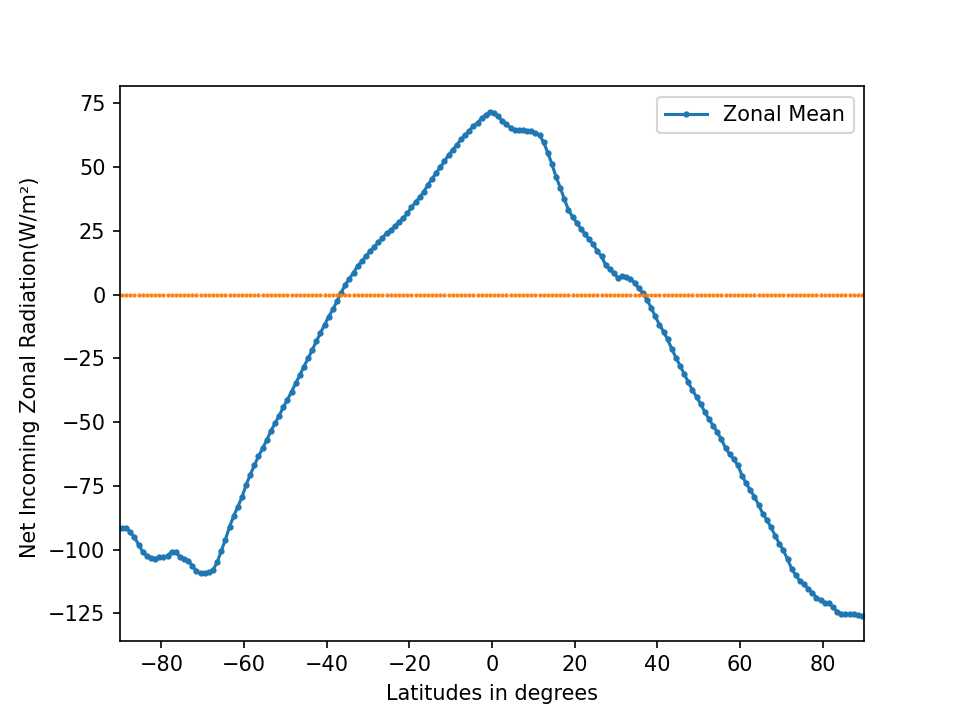

In [95]:

%matplotlib notebook
net_zonal_mean=mean_incoming_rad_time.mean(dim='lon')
plt.plot(net_zonal_mean.lat, net_zonal_mean,marker='o', label="Zonal Mean",markersize=2)
plt.axis(xmin=-90,xmax=90)
plt.plot(net_zonal_mean.lat,net_zonal_mean.lat*0, marker='o', linestyle=' ',markersize=1)

plt.xlabel('Latitudes in degrees')
plt.ylabel('Net Incoming Zonal Radiation(W/m²) ')
plt.legend()
plt.show()



**Compute the integral discussed in class for all values of latitude available in the data. Figure out how to use scipy’s trapz() function to achieve this.**

3(a)**How much energy(percentage) is reflected(albedo) during July. And compare this with the albedo in January.**

In [107]:
only_july= olr_data['time.month']==7 
only_jan = olr_data['time.month']==1

out_swdatajuly=out_sw_data.groupby(only_july==True).mean(dim='time')[1]
in_swdatajuly=in_sw_data.groupby(only_july==True).mean(dim='time')[1]

out_swdatajan=out_sw_data.groupby(only_jan==True).mean(dim='time')[1]
in_swdatajan=in_sw_data.groupby(only_jan==True).mean(dim='time')[1]

albedo_jan_avg= out_swdatajan/in_swdatajan

albedo_july_avg= out_swdatajuly/in_swdatajuly

albedo_july_south_asia=albedo_july_avg.loc[dict(lon=slice(60.5, 97.5), lat=slice(-0.5, 35.5))]

albedo_jan_south_asia=albedo_jan_avg.loc[dict(lon=slice(60.5, 97.5), lat=slice(-0.5, 35.5))]




<IPython.core.display.Javascript object>


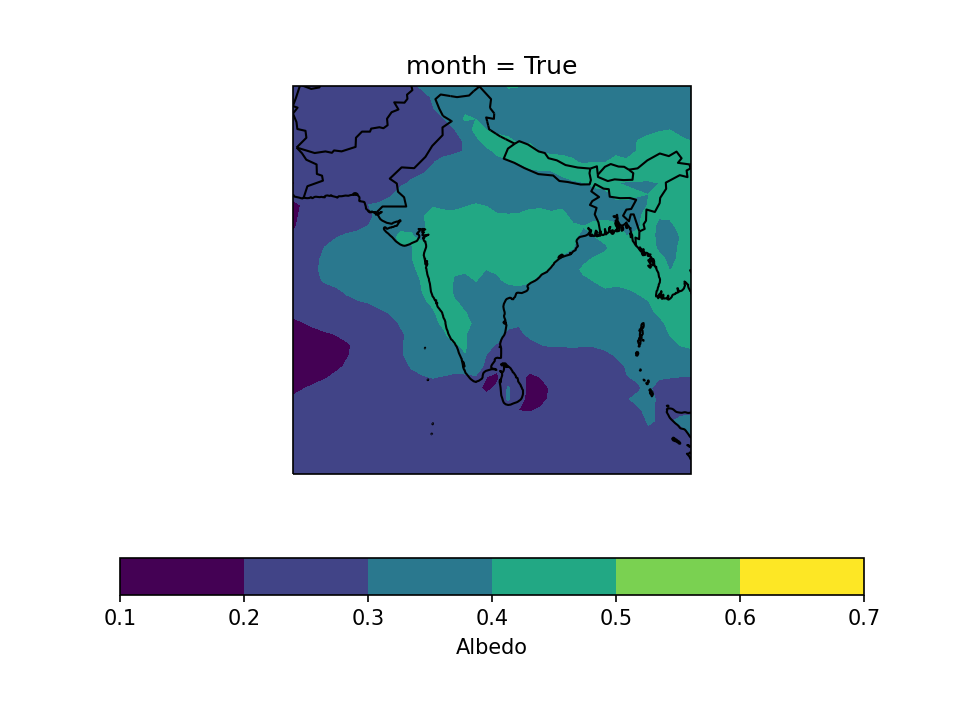

In [111]:
%matplotlib notebook


ax = plt.subplot(projection=ccrs.PlateCarree())

albedo_july_south_asia.plot.contourf(ax=ax, cbar_kwargs = dict(orientation='horizontal',label='Albedo'),vmin=0.1,vmax=0.7,transform=ccrs.PlateCarree())
ax.add_feature(cf.BORDERS.with_scale('110m'))
ax.coastlines()

<IPython.core.display.Javascript object>


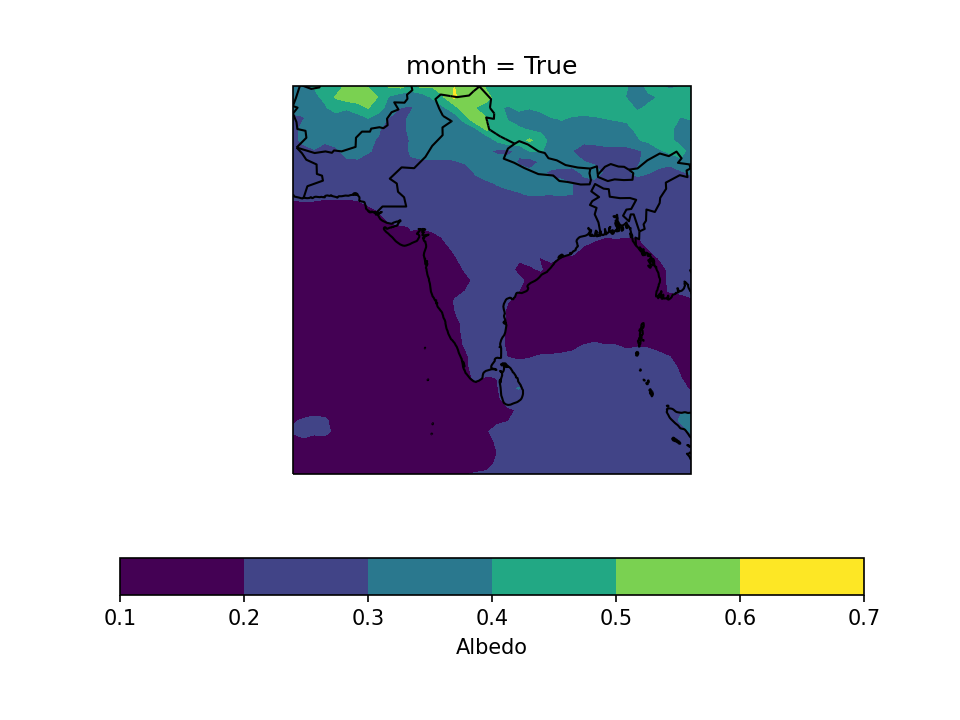

In [112]:
%matplotlib notebook


ax = plt.subplot(projection=ccrs.PlateCarree())

albedo_jan_south_asia.plot.contourf(ax=ax, cbar_kwargs = dict(orientation='horizontal',label='Albedo'),transform=ccrs.PlateCarree())
ax.add_feature(cf.BORDERS.with_scale('110m'))
ax.coastlines()

<IPython.core.display.Javascript object>


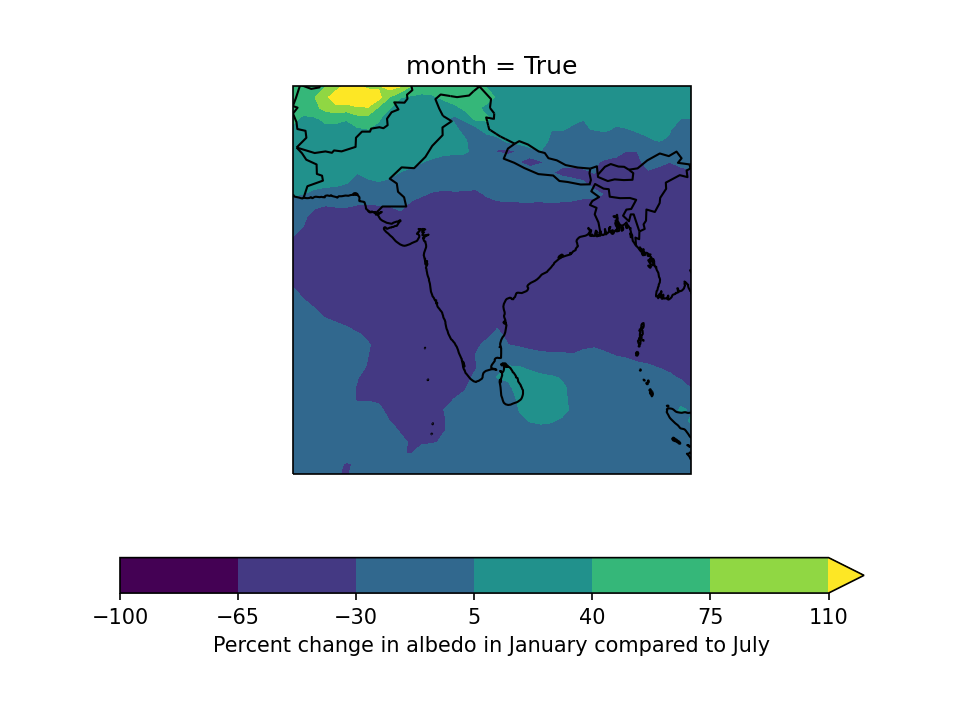

In [115]:
percent_change_in_january_compared_to_july=((albedo_jan_south_asia-albedo_july_south_asia)/albedo_july_south_asia)*100
%matplotlib notebook


ax = plt.subplot(projection=ccrs.PlateCarree())

percent_change_in_january_compared_to_july.plot.contourf(ax=ax, cbar_kwargs = dict(orientation='horizontal',label='Percent change in albedo in January compared to July'),vmin=-100,vmax=110,transform=ccrs.PlateCarree())
ax.add_feature(cf.BORDERS.with_scale('110m'))
ax.coastlines()

**See the net effect of clouds on the surface energy balance by comparing energy exchanged at surface with energy exchanged at top of atmosphere.**

Excess incoming energy on land seems to have some correlation with the energy transport term

<IPython.core.display.Javascript object>


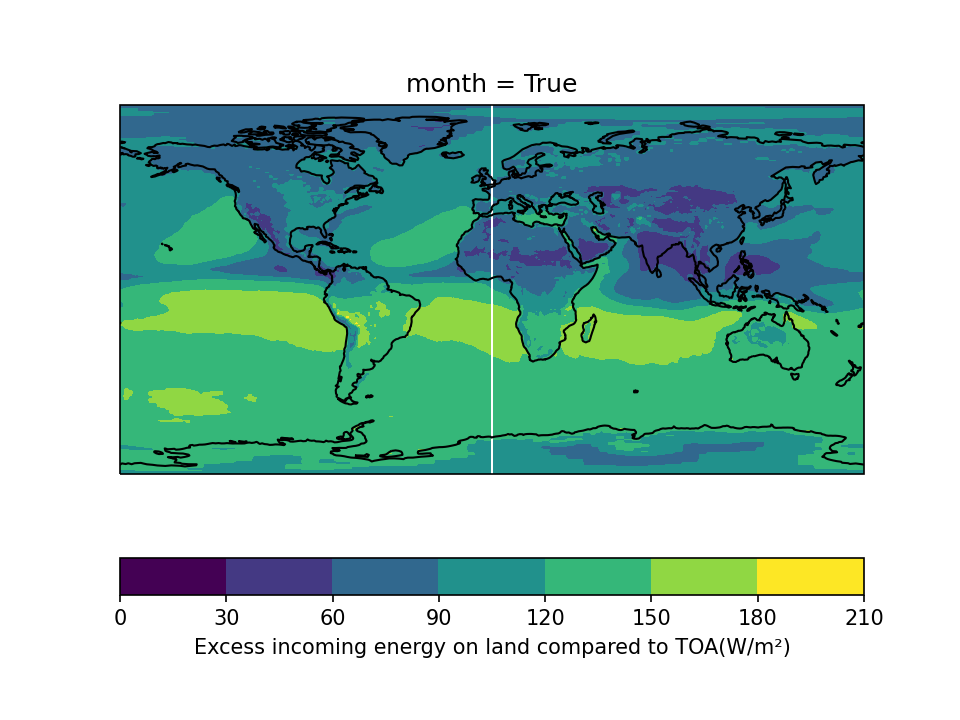

In [127]:
outlandlwjuly=outof_land_lwdata.groupby(only_july==True).mean(dim='time')[1]
outlandswjuly=outof_land_swdata.groupby(only_july==True).mean(dim='time')[1]
inlandlwjuly=in_land_lwdata.groupby(only_july==True).mean(dim='time')[1]
inlandswjuly=in_land_swdata.groupby(only_july==True).mean(dim='time')[1]

netincomingtoajuly=netincoming_rad.groupby(only_july==True).mean(dim='time')[1]

netincominglanjuly=(inlandlwjuly+inlandswjuly)-(outlandswjuly+outlandlwjuly)

netexcessland=(netincominglanjuly-netincomingtoajuly)

%matplotlib notebook


ax = plt.subplot(projection=ccrs.PlateCarree())

netexcessland.plot.contourf(ax=ax, cbar_kwargs = dict(orientation='horizontal',label='Excess incoming energy on land compared to TOA(W/m²)'),transform=ccrs.PlateCarree())


ax.coastlines()

netincominglandjulySAsia=netincominglanjuly.loc[dict(lon=slice(65.5, 97.5), lat=slice(-0.5, 33.5))]
netincomingtoajulySAsia=netincomingtoajuly.loc[dict(lon=slice(65.5, 97.5), lat=slice(-0.5, 33.5))]
#netexcessland related to conversion of radiation to latent heat (water cycle?) 




<IPython.core.display.Javascript object>


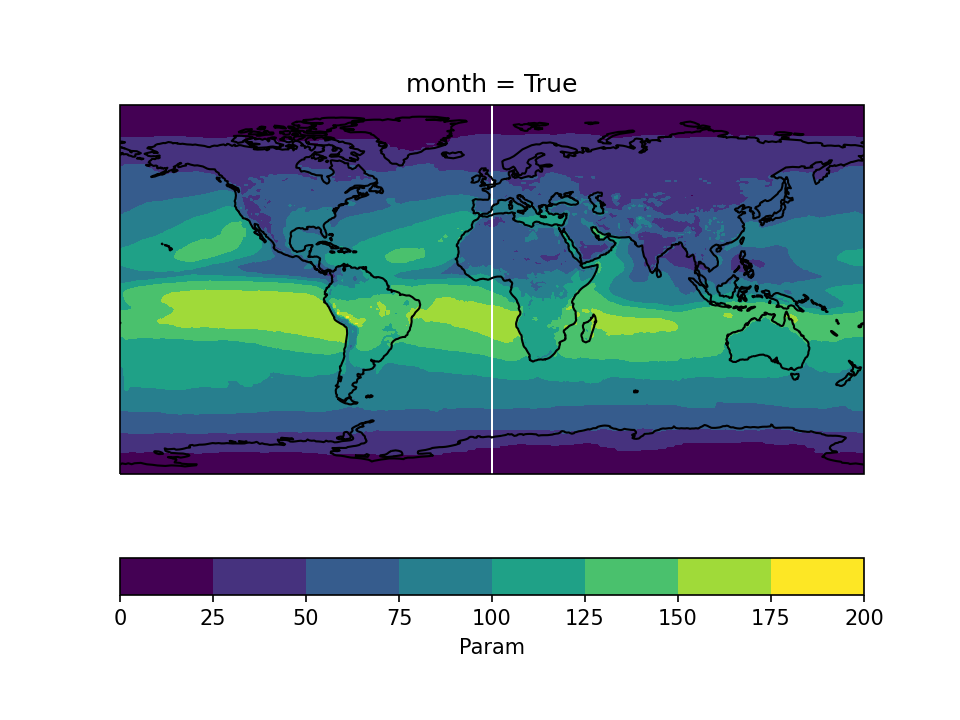

In [121]:
latitudes=netexcessland.lat
lat=latitudes*(math.pi/180)
param=netexcessland*np.cos(lat)

%matplotlib notebook


ax = plt.subplot(projection=ccrs.PlateCarree())

param.plot.contourf(ax=ax, cbar_kwargs = dict(orientation='horizontal',label='Param'),levels=10,transform=ccrs.PlateCarree())
ax.coastlines()

#param related tp energy trnsport kind of, ig but net excessenergy smhow related to cloud cover, will have to tweak it a bit to see sm relation

<IPython.core.display.Javascript object>


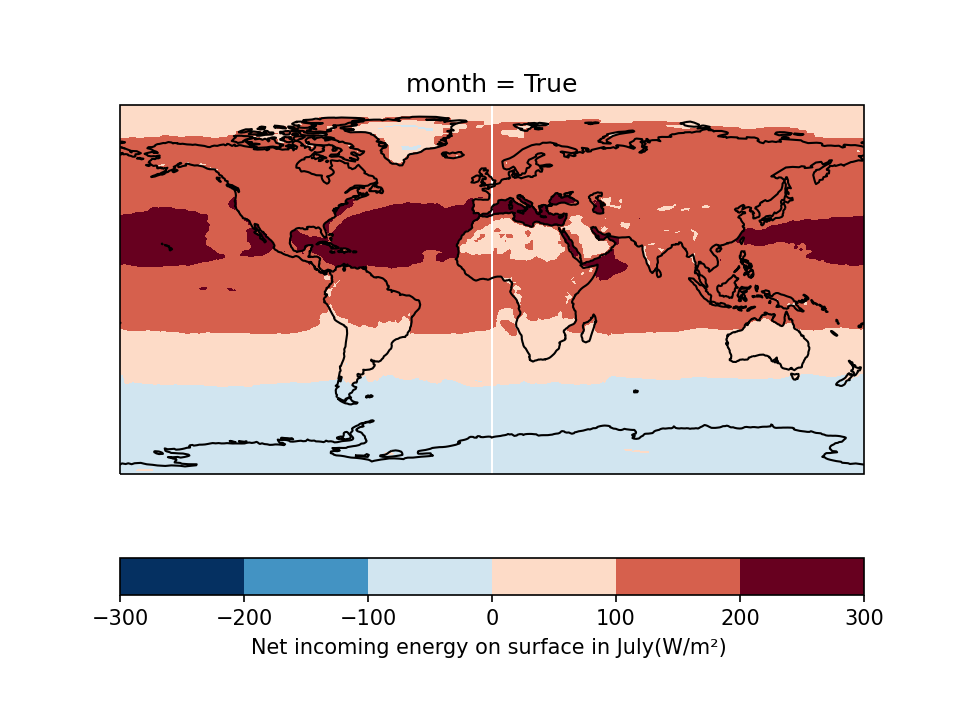

In [31]:
%matplotlib notebook


ax = plt.subplot(projection=ccrs.PlateCarree())
netincominglanjuly.plot.contourf(ax=ax, cbar_kwargs = dict(orientation='horizontal',label='Net incoming energy on surface in July(W/m²) '),transform=ccrs.PlateCarree())
ax.coastlines()

<IPython.core.display.Javascript object>


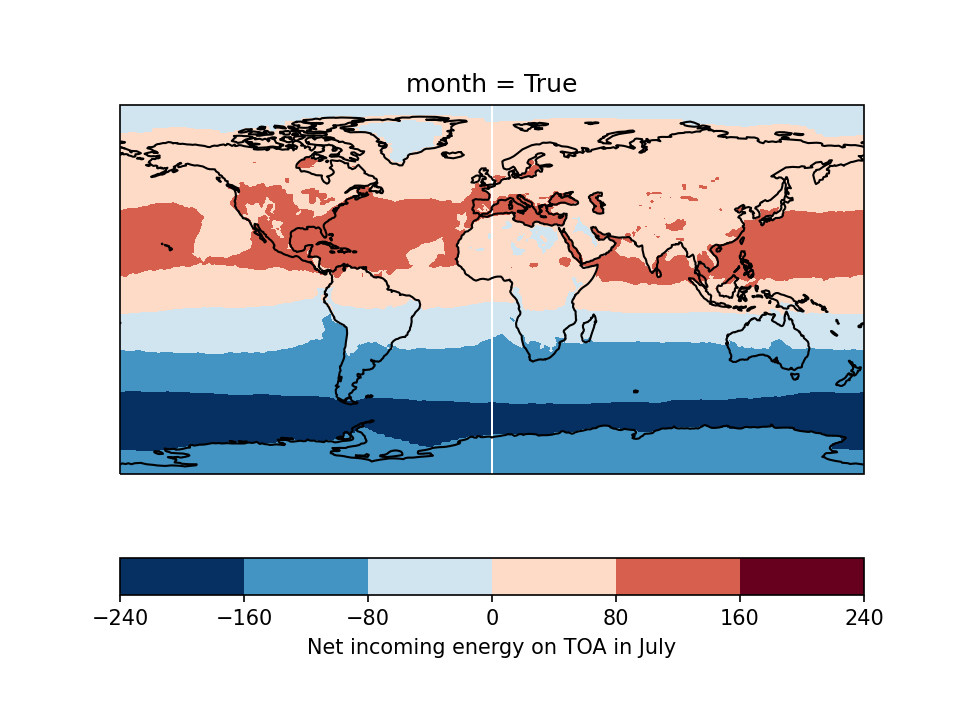

In [32]:
%matplotlib notebook


ax = plt.subplot(projection=ccrs.PlateCarree())
netincomingtoajuly.plot.contourf(ax=ax, cbar_kwargs = dict(orientation='horizontal',label='Net incoming energy on TOA in July'),levels=6,transform=ccrs.PlateCarree(),robust=True)
ax.coastlines()

<IPython.core.display.Javascript object>


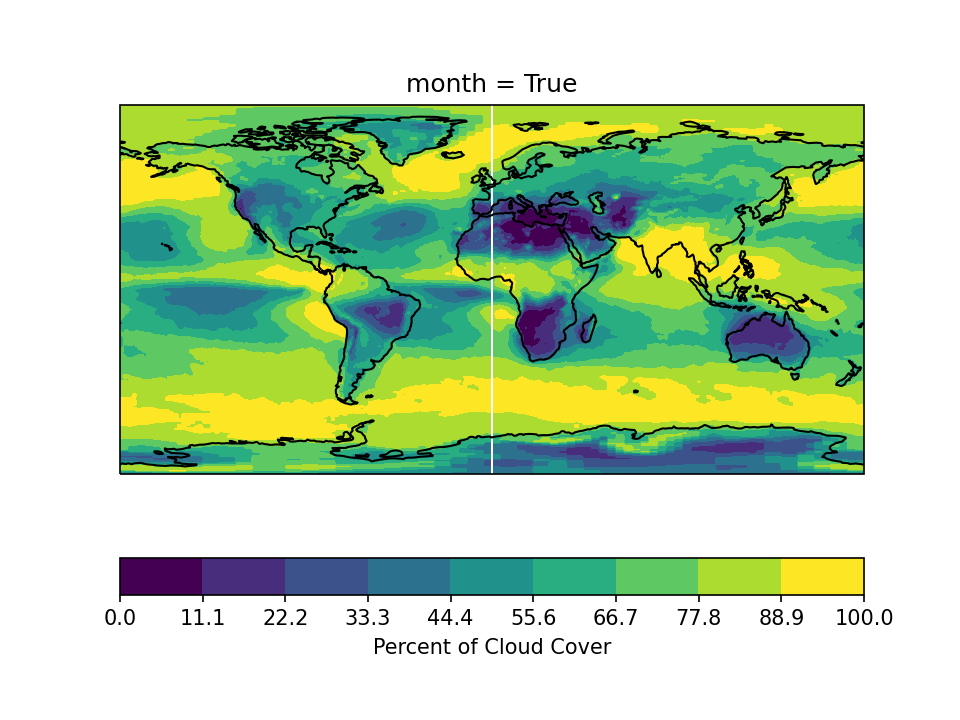

In [33]:
%matplotlib notebook


ax = plt.subplot(projection=ccrs.PlateCarree())
cloud_cover_areapercent.groupby(only_july==True).mean(dim='time')[1].plot.contourf(ax=ax, cbar_kwargs = dict(orientation='horizontal',label='Percent of Cloud Cover'),levels=10,vmin=0,vmax=100,transform=ccrs.PlateCarree())
ax.coastlines()

<IPython.core.display.Javascript object>


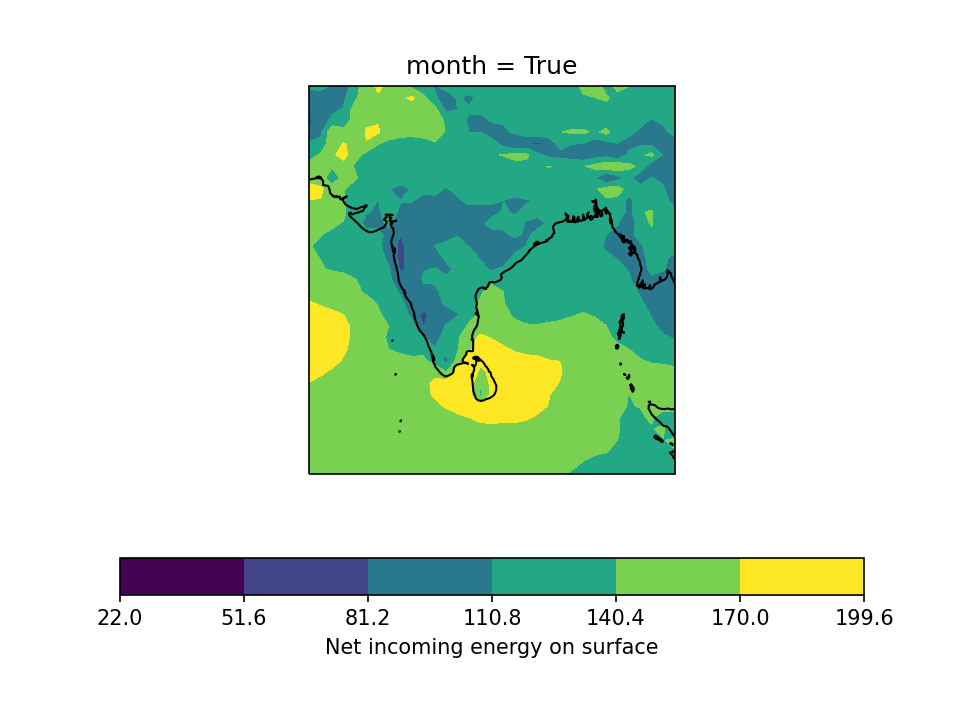

In [34]:
%matplotlib notebook


ax = plt.subplot(projection=ccrs.PlateCarree())

netincominglandjulySAsia.plot.contourf(ax=ax, cbar_kwargs = dict(orientation='horizontal',label='Net incoming energy on surface'),vmin=22,transform=ccrs.PlateCarree())

ax.coastlines()

<IPython.core.display.Javascript object>


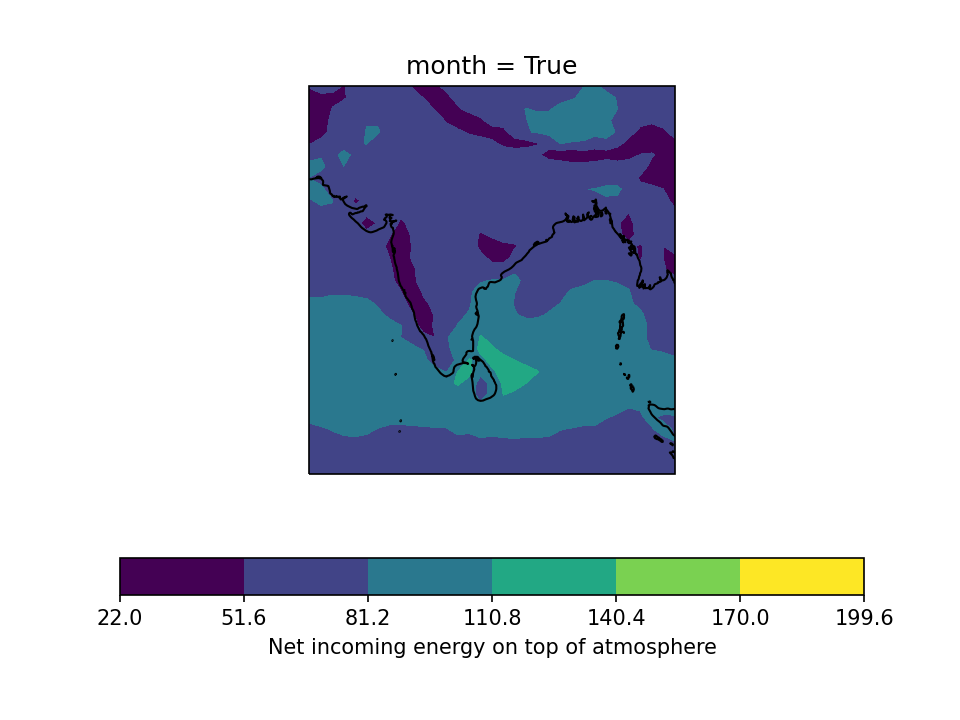

In [35]:
%matplotlib notebook


ax = plt.subplot(projection=ccrs.PlateCarree())

netincomingtoajulySAsia.plot.contourf(ax=ax, cbar_kwargs = dict(orientation='horizontal',label='Net incoming energy on top of atmosphere'),vmax=199.6,transform=ccrs.PlateCarree())

ax.coastlines()

<IPython.core.display.Javascript object>


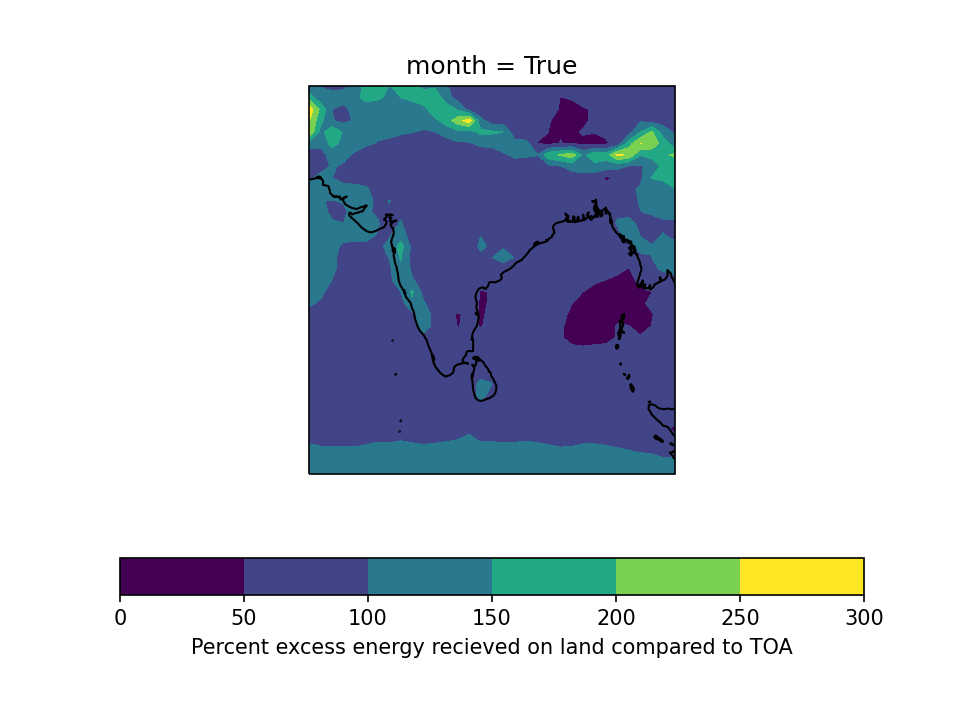

In [36]:
Times_heat_absorbed_on_landvstoa=((netincominglandjulySAsia-netincomingtoajulySAsia)/netincomingtoajulySAsia)*100
%matplotlib notebook


ax = plt.subplot(projection=ccrs.PlateCarree())

Times_heat_absorbed_on_landvstoa.plot.contourf(ax=ax, cbar_kwargs = dict(orientation='horizontal',label='Percent excess energy recieved on land compared to TOA'),transform=ccrs.PlateCarree())

ax.coastlines()

Wherever it rains, heat is transferred from water vapour in water to air in order to convert vapour into water. This heat is then transferred to ground and TOA both. Inspite of this excess source of energy, it is seen that clouds manage to reduce energy being recieved at ground and TOA both. 

The clouds also lead to a sort of levelling effect by reducing the excess energy recieved on ground when compared to TOA. As seen from global excess energy graph. The location ITCZ can be approximated by the cloud coverage percent graph. It is the area of relatively high cloud cover a bit north of equator. 

When this graph is superimposed on the excess energy graph an area of high cloud cover(ITCZ) appears to coincide with areas of low difference in TOA surface incoming energies. 

THis could be due to the nature of clouds that are formed around the ITCZ

<IPython.core.display.Javascript object>


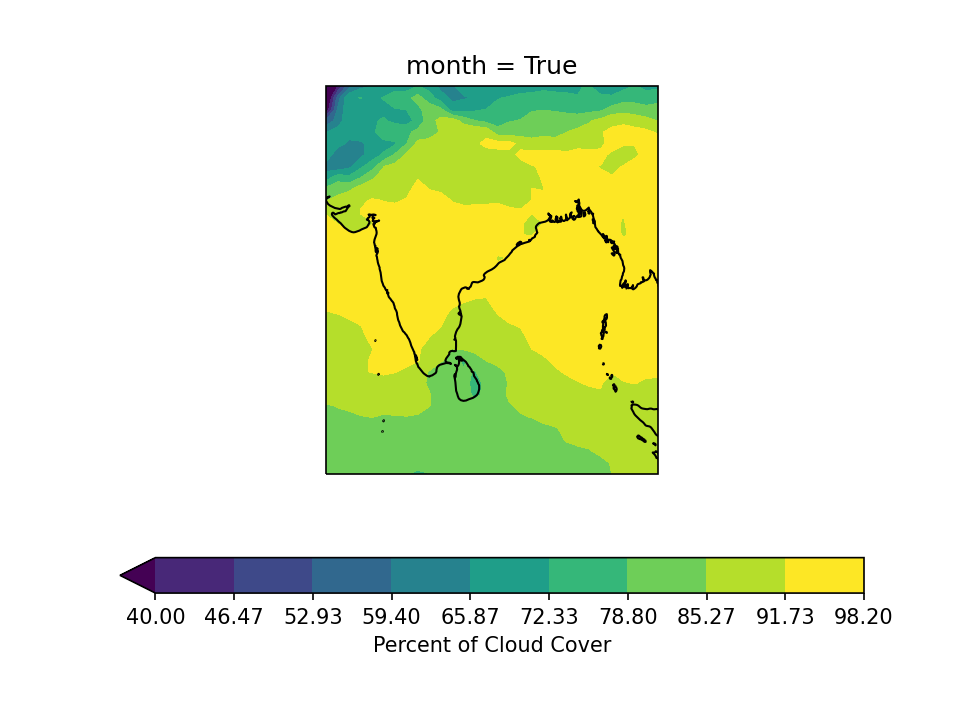

In [130]:
%matplotlib notebook

ax = plt.subplot(projection=ccrs.PlateCarree())
cloud_cover_areapercent.groupby(only_july==True).mean(dim='time')[1].loc[dict(lon=slice(68.5, 97.5), lat=slice(-0.5, 33.5))].plot.contourf(ax=ax, cbar_kwargs = dict(orientation='horizontal',label='Percent of Cloud Cover'),vmin=40,levels=10,transform=ccrs.PlateCarree())
ax.coastlines()

I have chosen oceanic to find the albedo of clouds over an oceanic region as the albedo of oceanic regions remain more or less constant as they are free from influence of physical and biotic processes that alter albedo on land on similar latitudes. These clouds, would eventually move on to cause rain on land so can be considered to be albedo of 'fully-laden' monsoon clouds. Loss of water on land from clouds in form of rain can also effect the albedo.


I have used SFC short wave data to find the albedo of the surface, and then used the TOA data to find the albedo at the top of atmosphere for given Location and time. And then use the cloud cover area dataset to find the albedo of clouds


This method is pretty accurate and easily generalisable to most of the dataset, but depends on the accuracy of SFC data. Furthermore, this cannot be used for times and places where/when incoming short wave is 0 and/or refracted shortwave makes for a large part of TOA readings.( Example: Polar regions)

This should give a rough approximation of the albedo of clouds in the year of interest. However, I am not sure how the error percentages would work out to be as monsoon cloud formation is dependent on many factors like ENSO cycle, the past climate states and so on....

We shall solve and try finding the albedo for atleast one case.

72.5 E, 18.5 N(off coast of Mahrashtra(south of Mumbai) 2013 July. The location and time are arbitrarily chosen. 

Source:
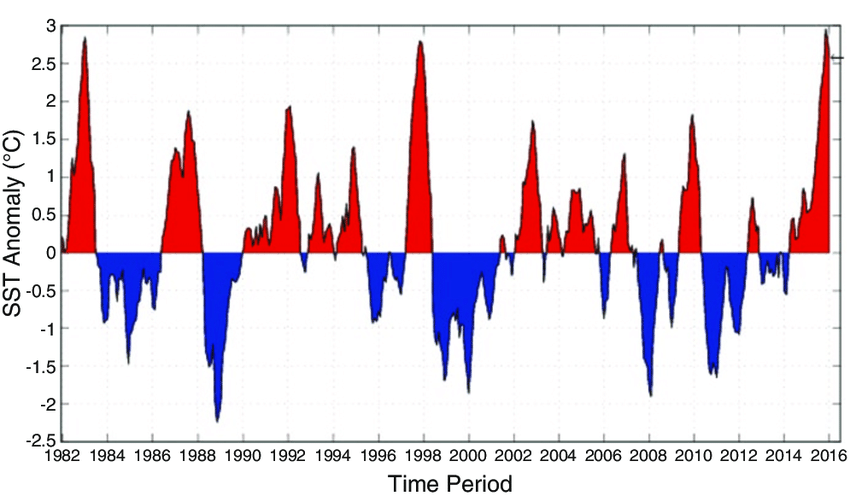






In [131]:
avg_julycloudcover_southasia=cloud_cover_areapercent.groupby(only_july==True).mean(dim='time')[1].loc[dict(lon=slice(68.5, 97.5), lat=slice(-0.5, 33.5))]

print(cloud_cover_areapercent.sel(lon=72.5,lat=18.5,time='2013-07-15'))

<xarray.DataArray 'cldarea_total_daynight_mon' ()>
array(98.57662, dtype=float32)
Coordinates:
    lon      float32 72.5
    lat      float32 18.5
    time     datetime64[ns] 2013-07-15
Attributes:
    long_name:      Cloud Area Fraction, Daytime-and-Nighttime conditions, Mo...
    standard_name:  Cloud Area Fraction - Daytime-and-Nighttime
    CF_name:        cloud_area_fraction
    comment:        none
    units:          percent
    valid_min:            0.00000
    valid_max:            100.000


Cloud cover percent at:
72.5E, 18.5N on 2013 July is 98.576622%

Net Albedo at:
72.5E, 18.5N on 2013 July  is 0.4769744

Albedo of Ocean at(using SFC sw data) :
72.5E, 18.5N on 2013 July is 0.07608606

Average cloud cover over all the years in July and same location = 95.58018%
Average albedo at same location and month = 0.42029706

We have albedo at surface and net albedo and 

Net_albedo = {(cloud_cover_percent/100) * albedo_cloud} +{(1-(cloud_cover_percent/100)} * albedo_surface

=>  albedo_cloud= ( Net_albedo - {(1-(cloud_cover_percent/100)} * albedo_surface)/(cloud_cover_percent/100)


from our data we plug in values to get approximate albedo of clouds as:

albedo_cloud for given location and time = {0.4769744 - (1- 0.98576622)* 0.07608606}/ 0.98576622

= 0.48276295




In [132]:
print(avg_julycloudcover_southasia.sel(lon=72.5,lat=18.5))

<xarray.DataArray 'cldarea_total_daynight_mon' ()>
array(95.58018, dtype=float32)
Coordinates:
    lon      float32 72.5
    lat      float32 18.5
    month    bool True


In [133]:
albedo= out_sw_data/in_sw_data

albedo_avgjuly= albedo.groupby(only_july==True).mean(dim='time')[1]

albedo_ocean=outof_land_swdata/in_land_swdata


print(albedo_avgjuly.sel(lon=72.5,lat=18.5))

print(albedo.sel(lon=72.5,lat=18.5,time='2013-07-15'))

print(albedo_ocean.sel(lon=72.5,lat=18.5,time='2013-07-15'))

<xarray.DataArray ()>
array(0.42029706, dtype=float32)
Coordinates:
    lon      float32 72.5
    lat      float32 18.5
    month    bool True
<xarray.DataArray ()>
array(0.4769744, dtype=float32)
Coordinates:
    lon      float32 72.5
    lat      float32 18.5
    time     datetime64[ns] 2013-07-15
<xarray.DataArray ()>
array(0.07608606, dtype=float32)
Coordinates:
    lon      float32 72.5
    lat      float32 18.5
    time     datetime64[ns] 2013-07-15


In [134]:
albedo_cloud= (albedo - ((1-cloud_cover_areapercent/100)*albedo_ocean))/(cloud_cover_areapercent/100)
a= albedo_cloud.sel(lon=72.5,lat=18.5,time='2013-07-15')
print( "Albedo of cloud is",a)


Albedo of cloud is <xarray.DataArray ()>
array(0.48276293, dtype=float32)
Coordinates:
    lon      float32 72.5
    lat      float32 18.5
    time     datetime64[ns] 2013-07-15


<IPython.core.display.Javascript object>


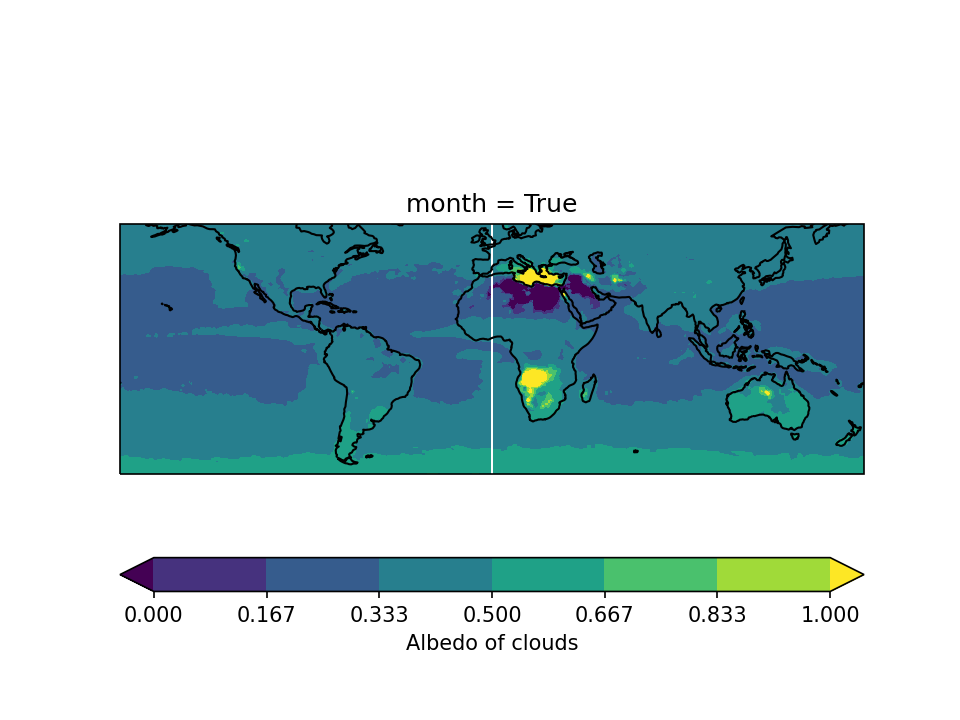

In [136]:
%matplotlib notebook


ax = plt.subplot(projection=ccrs.PlateCarree())

albedo_cloud.groupby(only_july==True).mean(dim='time')[1].loc[dict(lat=slice(-60.5, +60.5))].plot.contourf(ax=ax, cbar_kwargs = dict(orientation='horizontal',label='Albedo of clouds'),vmin=0,vmax=1,transform=ccrs.PlateCarree())

ax.coastlines()

The above cloud albedo map is not accurate for polar regions and it's error range increases as we move polewards(due to increasing component of refracted shortwave radiation at TOA for higher latitudes)

It is also not very accurate for very low values of cloud cover and for places where there is net outgoing radiation from earth

It is also not accurate for desert and surrounding regions as it can lead to inclusion of albedo of suspended dust particles from dust storms rather than albedo of clouds. This could lead to inflated/deflated values depending on the place and time.

Compute the integral discussed in class for all values of latitude available in the data. Figure out how to use scipy’s trapz() function to achieve this.

In [137]:
latitudes=net_zonal_mean.lat


lat=latitudes*(math.pi/180)
lat
integrand=(net_zonal_mean*np.cos(lat))*2*(math.pi)*((6371000)**2)
lat

<xarray.DataArray 'lat' (lat: 180)>
array([-1.5620697 , -1.5446163 , -1.527163  , -1.5097098 , -1.4922565 ,
       -1.4748032 , -1.4573499 , -1.4398966 , -1.4224433 , -1.4049901 ,
       -1.3875368 , -1.3700835 , -1.3526301 , -1.3351768 , -1.3177236 ,
       -1.3002703 , -1.282817  , -1.2653637 , -1.2479104 , -1.2304571 ,
       -1.2130039 , -1.1955506 , -1.1780972 , -1.1606439 , -1.1431906 ,
       -1.1257373 , -1.1082841 , -1.0908308 , -1.0733775 , -1.0559242 ,
       -1.0384709 , -1.0210176 , -1.0035644 , -0.98611104, -0.96865773,
       -0.9512044 , -0.93375117, -0.91629785, -0.89884454, -0.8813913 ,
       -0.863938  , -0.84648466, -0.8290314 , -0.8115781 , -0.7941248 ,
       -0.7766715 , -0.7592182 , -0.7417649 , -0.72431165, -0.70685834,
       -0.689405  , -0.6719518 , -0.65449846, -0.63704515, -0.6195919 ,
       -0.6021386 , -0.58468527, -0.567232  , -0.5497787 , -0.53232545,
       -0.51487213, -0.49741882, -0.47996554, -0.46251225, -0.44505894,
       -0.42760566, -0.41015238, -0.3926991 , -0.37524578, -0.3577925 ,
       -0.3403392 , -0.3228859 , -0.30543262, -0.28797933, -0.27052602,
       -0.25307274, -0.23561944, -0.21816616, -0.20071286, -0.18325958,
       -0.16580628, -0.14835298, -0.1308997 , -0.1134464 , -0.09599311,
       -0.07853982, -0.06108652, -0.04363323, -0.02617994, -0.00872665,
        0.00872665,  0.02617994,  0.04363323,  0.06108652,  0.07853982,
        0.09599311,  0.1134464 ,  0.1308997 ,  0.14835298,  0.16580628,
        0.18325958,  0.20071286,  0.21816616,  0.23561944,  0.25307274,
        0.27052602,  0.28797933,  0.30543262,  0.3228859 ,  0.3403392 ,
        0.3577925 ,  0.37524578,  0.3926991 ,  0.41015238,  0.42760566,
        0.44505894,  0.46251225,  0.47996554,  0.49741882,  0.51487213,
        0.53232545,  0.5497787 ,  0.567232  ,  0.58468527,  0.6021386 ,
        0.6195919 ,  0.63704515,  0.65449846,  0.6719518 ,  0.689405  ,
        0.70685834,  0.72431165,  0.7417649 ,  0.7592182 ,  0.7766715 ,
        0.7941248 ,  0.8115781 ,  0.8290314 ,  0.84648466,  0.863938  ,
        0.8813913 ,  0.89884454,  0.91629785,  0.93375117,  0.9512044 ,
        0.96865773,  0.98611104,  1.0035644 ,  1.0210176 ,  1.0384709 ,
        1.0559242 ,  1.0733775 ,  1.0908308 ,  1.1082841 ,  1.1257373 ,
        1.1431906 ,  1.1606439 ,  1.1780972 ,  1.1955506 ,  1.2130039 ,
        1.2304571 ,  1.2479104 ,  1.2653637 ,  1.282817  ,  1.3002703 ,
        1.3177236 ,  1.3351768 ,  1.3526301 ,  1.3700835 ,  1.3875368 ,
        1.4049901 ,  1.4224433 ,  1.4398966 ,  1.4573499 ,  1.4748032 ,
        1.4922565 ,  1.5097098 ,  1.527163  ,  1.5446163 ,  1.5620697 ],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

<IPython.core.display.Javascript object>


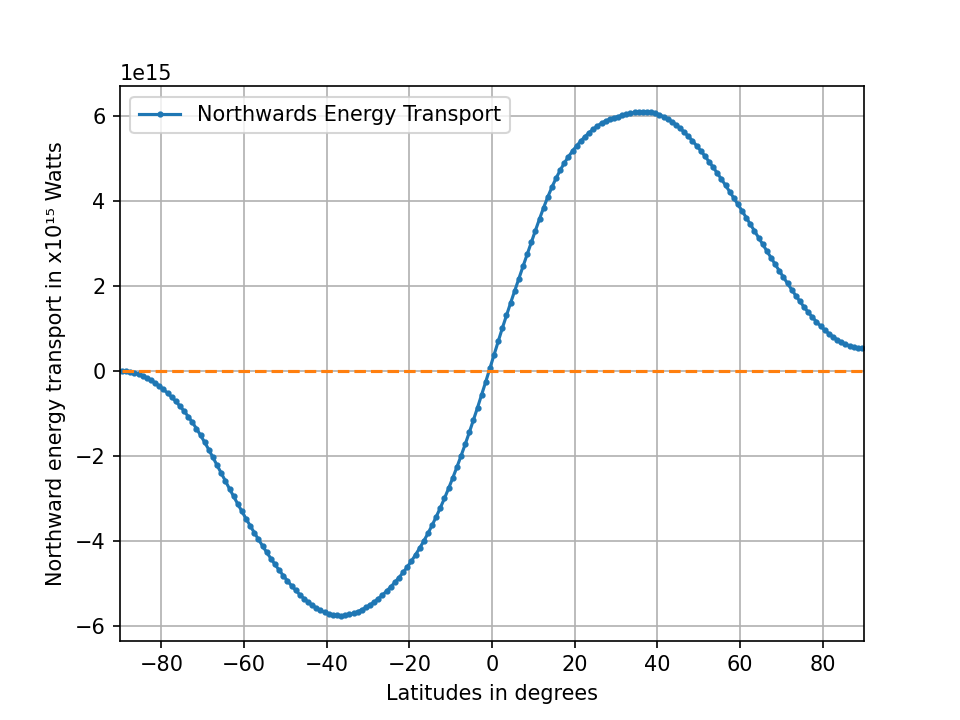

In [138]:
%matplotlib notebook

energy_transport_northwrds= integrate.cumtrapz(integrand,lat, initial=0)
plt.axis(xmin=-90,xmax=90)
plt.xlabel('Latitudes in degrees')
plt.ylabel('Northward energy transport in x10¹⁵ Watts')
plt.plot(latitudes ,energy_transport_northwrds,marker='o',markersize=2,label='Northwards Energy Transport')
plt.plot(latitudes, 0*latitudes, linestyle='dashed')
plt.legend()
plt.grid()
plt.show()

In [ ]:
plt.plot(net_zonal_mean.lat, net_zonal_mean,marker='o', label="Zonal Mean",markersize=2)
plt.axis(xmin=-90,xmax=90)


plt.xlabel('Latitudes in degrees')
plt.ylabel('Net Incoming Zonal Radiation(W/m²) ')
plt.legend()